In [3]:
import os 
import pandas as pd
import glob 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

pd.set_option('display.max_rows', 1000)

os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

outdir = 'results/notebooks/colocalization_with_eqtl_catalogue/'
os.makedirs(outdir, exist_ok=True)

In [4]:
import pycircos
import collections
import matplotlib.pyplot as plt
import wget
#import biopython

## Full Tutorial

In [16]:
Garc = pycircos.Garc
Gcircle = pycircos.Gcircle

In [17]:
circos_dir = 'results/temp/circos/'
os.makedirs(circos_dir, exist_ok=True)

In [18]:
#The following example data was downloaded from https://venyao.xyz/shinyCircos/.
example_data_barplot_url="https://github.com/ponnhide/pyCircos/raw/master/tutorial/sample_data/example_data_barplot.csv"
example_data_chromosome_cytoband_url = "https://github.com/ponnhide/pyCircos/raw/master/tutorial/sample_data/example_data_chromosome_cytoband.csv"
example_data_chromosome_general_url = "https://github.com/ponnhide/pyCircos/raw/master/tutorial/sample_data/example_data_chromosome_general.csv"
example_data_links_url = "https://github.com/ponnhide/pyCircos/raw/master/tutorial/sample_data/example_data_links.csv"
example_data_point_url = "https://github.com/ponnhide/pyCircos/raw/master/tutorial/sample_data/example_data_point.csv"
example_data_rect_gradual_url = "https://github.com/ponnhide/pyCircos/raw/master/tutorial/sample_data/example_data_rect_gradual.csv"
urls = [example_data_barplot_url, example_data_chromosome_cytoband_url, example_data_chromosome_general_url,
       example_data_links_url, example_data_point_url, example_data_rect_gradual_url]

circos_files = {}
for url in urls:
    wget.download(url, circos_dir)
    
    bn = os.path.basename(url)
    circos_files[bn] = os.path.join(circos_dir, bn)
    
# !wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/__init__.py
# !wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/pycircos.py
# !wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/tree.py

In [19]:
import pycircos
import collections
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [20]:
circle = Gcircle() 
with open(circos_files['example_data_chromosome_general.csv']) as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circle.add_garc(arc) 

<Figure size 576x576 with 0 Axes>

In [84]:
circos_files['example_data_chromosome_general.csv']

'results/temp/circos/example_data_chromosome_general.csv'

In [21]:
circle.set_garcs() 

In [22]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE",
                "gpos50":"#BBBBBB", "gpos75":"#777777",
                "gpos100":"#000000", "gvar":"#FFFFFF00",
                "stalk":"#C01E27", "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_chromosome_cytoband.csv']) as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[950,1000], facecolor=arcdata_dict[key]["colors"])    
    

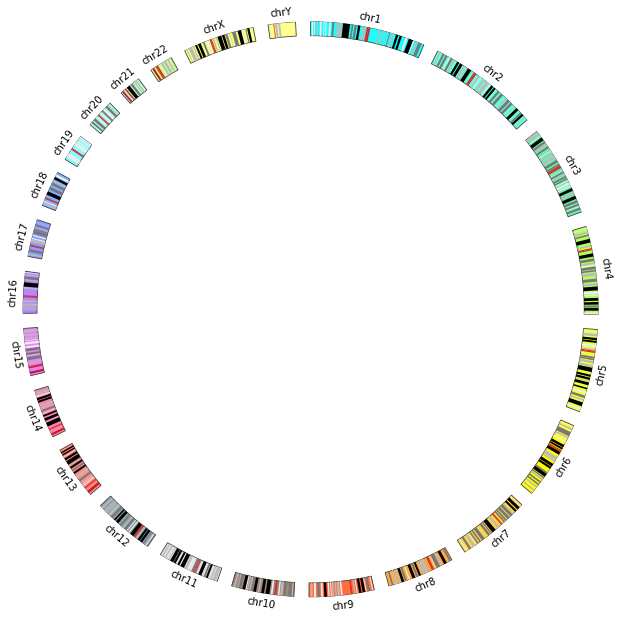

In [23]:
circle.figure

In [24]:
#line plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_point.csv']) as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.lineplot(key,
                    data=arcdata_dict[key]["values"],
                    positions=arcdata_dict[key]["positions"], 
                    rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
                    raxis_range=(770,850),
                    linecolor="royalblue",
                    spine=False) 

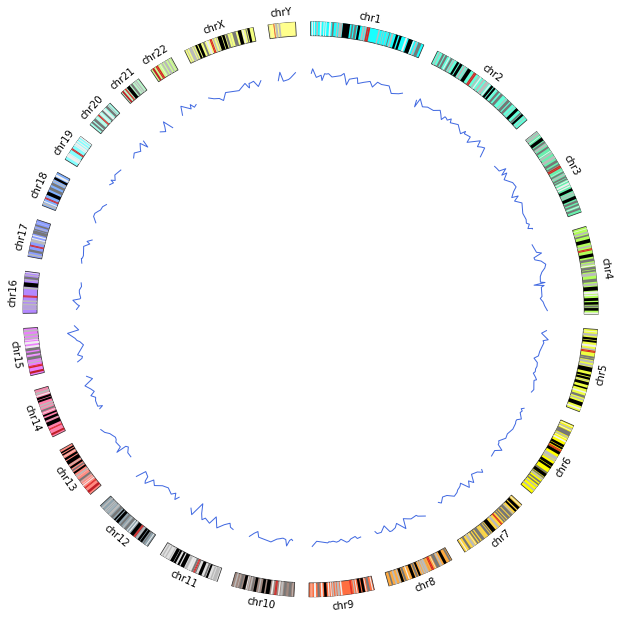

In [25]:
circle.figure

In [26]:
#bar plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_barplot.csv']) as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        width = end-start 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["values"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:  
    circle.barplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], base_value=0.0, rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
                   raxis_range=[680,760], facecolor="y", spine=True)

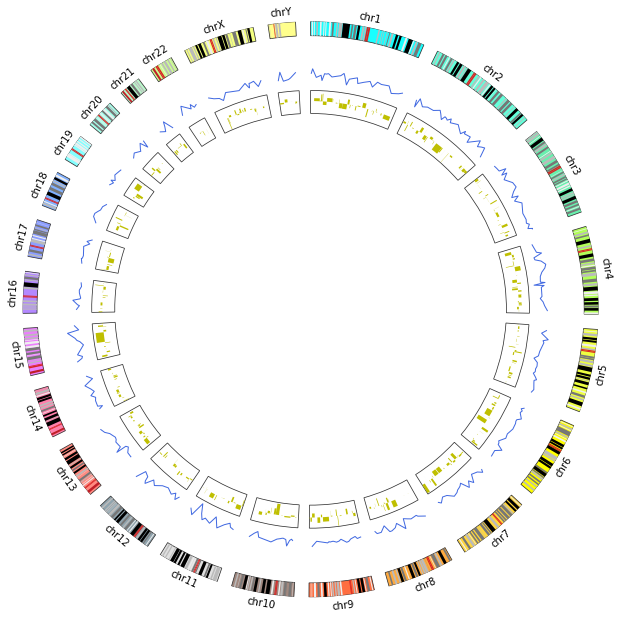

In [27]:
circle.figure

In [28]:
#heatmap
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_rect_gradual.csv']) as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        width = end-start 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["values"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.heatmap(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[630,670], vmin=vmin, vmax=vmax, 
                   cmap=plt.cm.viridis)

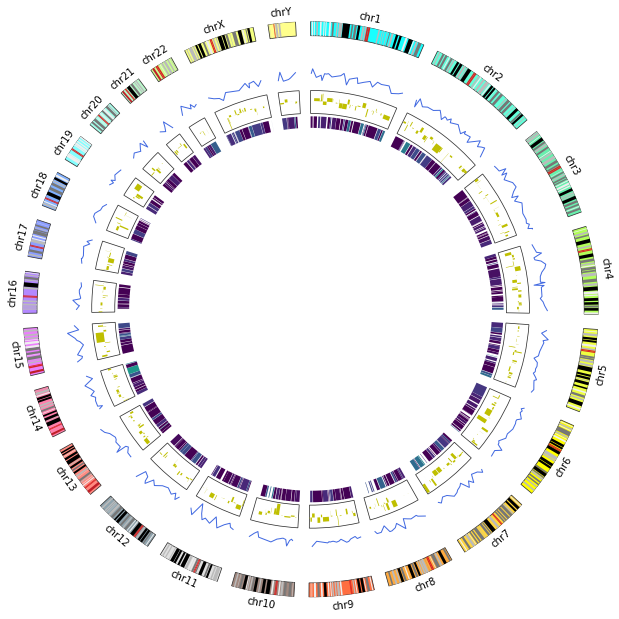

In [29]:
circle.figure

In [30]:
#linkplot
#heatmap
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_links.csv']) as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name1  = line[0]     
        start1 = int(line[1])-1
        end1   = int(line[2])
        name2  = line[3]     
        start2 = int(line[4])-1
        end2   = int(line[5])
        source = (name1, start1, end1, 630)
        destination = (name2, start2, end2, 630)
        circle.chord_plot(source, destination, facecolor=circle.garc_dict[name1].facecolor)

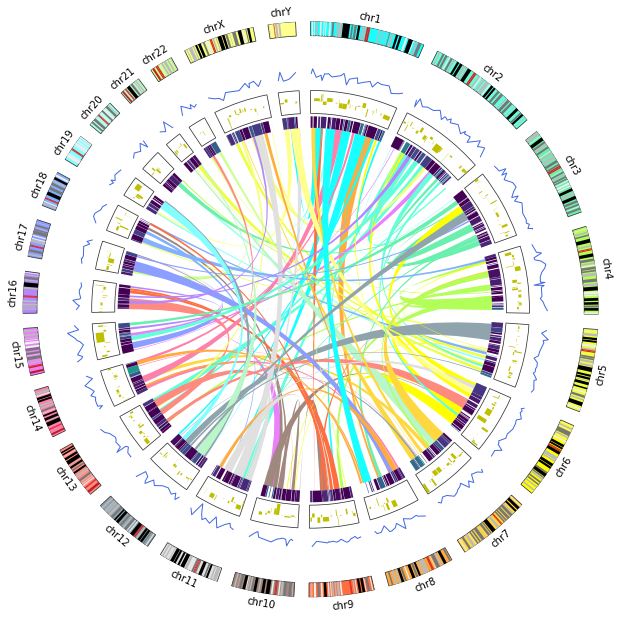

In [31]:
circle.figure

## Tailored Tutorial

In [32]:
chromosome_file = circos_files['example_data_chromosome_general.csv']

In [33]:
!head $chromosome_file

chr,start,end
chr1,1,249250621
chr2,1,243199373
chr3,1,198022430
chr4,1,191154276
chr5,1,180915260
chr6,1,171115067
chr7,1,159138663
chr8,1,146364022
chr9,1,141213431


In [34]:
# add chromosomes

In [57]:
circle = Gcircle()    
with open(circos_files['example_data_chromosome_general.csv']) as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name,
                      size=length,
                      interspace=3,
                      raxis_range=(750,800),
                      labelposition=60,
                      label_visible=True)
        circle.add_garc(arc) 

<Figure size 576x576 with 0 Axes>

In [58]:
circle.set_garcs() 

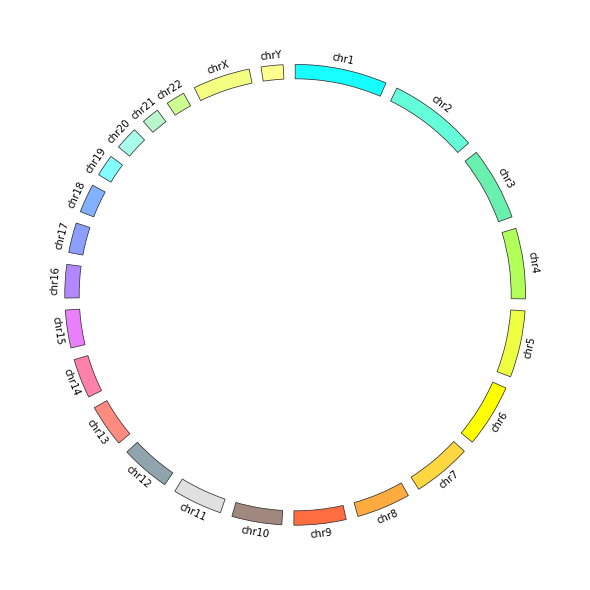

In [59]:
circle.figure

In [60]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE",
                "gpos50":"#BBBBBB", "gpos75":"#777777",
                "gpos100":"#000000", "gvar":"#FFFFFF00",
                "stalk":"#C01E27", "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_chromosome_cytoband.csv']) as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key,
                   data=[1]*len(arcdata_dict[key]["positions"]),
                   positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"],
                   raxis_range=[750,800],
                   facecolor=arcdata_dict[key]["colors"])    
    

In [85]:
circos_files['example_data_chromosome_cytoband.csv']

'results/temp/circos/example_data_chromosome_cytoband.csv'

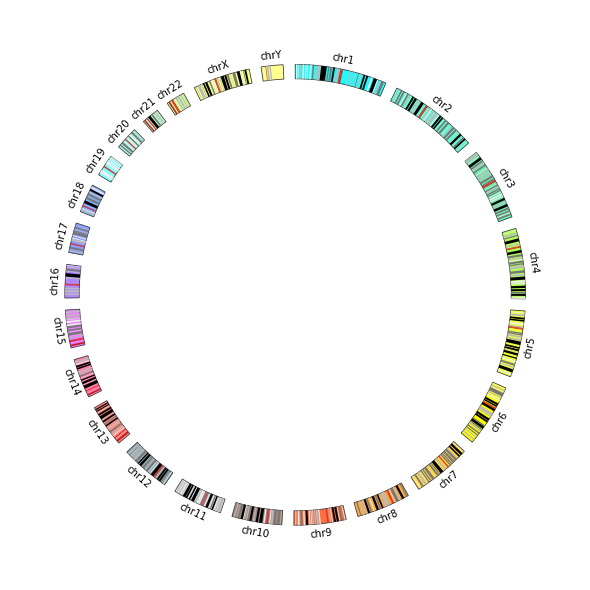

In [61]:
circle.figure

In [62]:
#linkplot
values_all = [] 
arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_links.csv']) as f:
    
    f.readline()
    
    for line in f:
        line  = line.rstrip().split(",")
        name1  = line[0]     
        start1 = int(line[1])-1
        end1   = int(line[2])
        name2  = line[3]     
        start2 = int(line[4])-1
        end2   = int(line[5])
        source = (name1, start1, end1, 650)
        destination = (name2, start2, end2, 660)
        circle.chord_plot(source,
                          destination,
                          facecolor=circle.garc_dict[name1].facecolor)

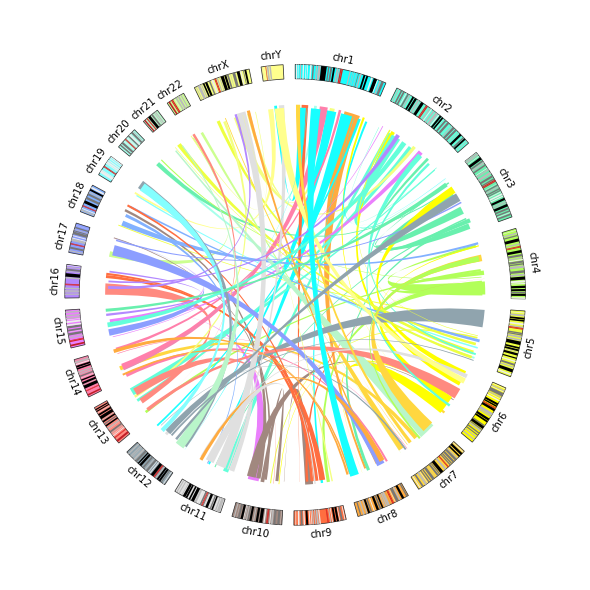

In [63]:
circle.figure

In [64]:
out_fn = os.path.join(circos_dir, 'test.svg')
circle.figure.savefig(out_fn)

## Single Chromosome Tutorial

In [65]:
chromosome_file = circos_files['example_data_chromosome_general.csv']

In [66]:
!head $chromosome_file

chr,start,end
chr1,1,249250621
chr2,1,243199373
chr3,1,198022430
chr4,1,191154276
chr5,1,180915260
chr6,1,171115067
chr7,1,159138663
chr8,1,146364022
chr9,1,141213431


In [67]:
# add chromosomes

In [68]:
circle = Gcircle()    
with open(circos_files['example_data_chromosome_general.csv']) as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        
        if name == 'chr1':
            
            length = int(line[-1]) 
            arc    = Garc(arc_id=name,
                          size=length,
                          interspace=3,
                          raxis_range=(750,800),
                          labelposition=60,
                          label_visible=True)
            circle.add_garc(arc) 

<Figure size 576x576 with 0 Axes>

In [69]:
circle.set_garcs() 

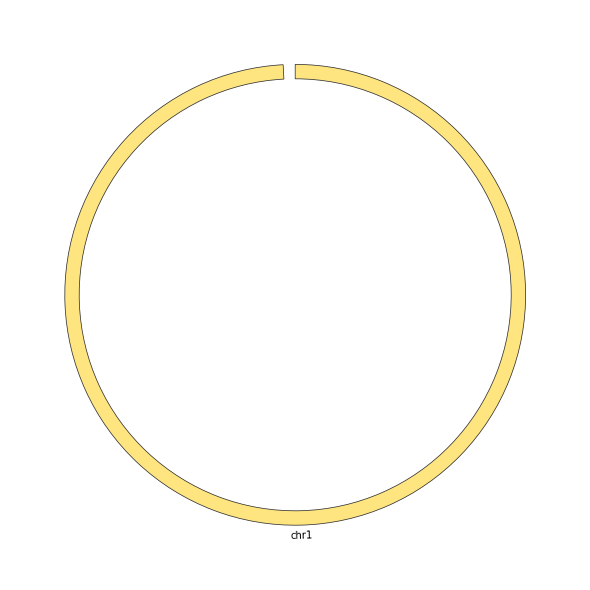

In [70]:
circle.figure

In [71]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE",
                "gpos50":"#BBBBBB", "gpos75":"#777777",
                "gpos100":"#000000", "gvar":"#FFFFFF00",
                "stalk":"#C01E27", "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_chromosome_cytoband.csv']) as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        
        if name == 'chr1':
            start = int(line[1])-1 
            width = int(line[2])-(int(line[1])-1) 
            if name not in arcdata_dict:
                arcdata_dict[name]["positions"] = []
                arcdata_dict[name]["widths"]    = [] 
                arcdata_dict[name]["colors"]    = [] 
            arcdata_dict[name]["positions"].append(start) 
            arcdata_dict[name]["widths"].append(width)
            arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key,
                   data=[1]*len(arcdata_dict[key]["positions"]),
                   positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"],
                   raxis_range=[750,800],
                   facecolor=arcdata_dict[key]["colors"])    
    

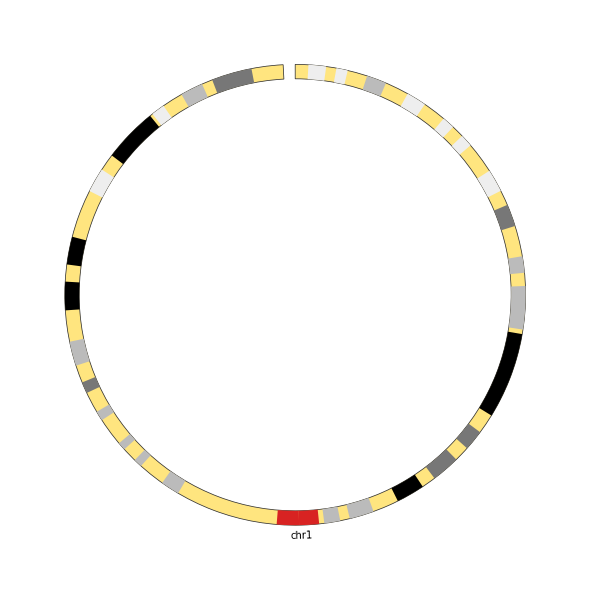

In [72]:
circle.figure

In [73]:
#linkplot
values_all = [] 
arcdata_dict = collections.defaultdict(dict)
with open(circos_files['example_data_links.csv']) as f:
    
    f.readline()
    
    for line in f:
        line  = line.rstrip().split(",")
        
        if name1 == 'chr1' and name2 == 'chr1':
            name1  = line[0]     
            start1 = int(line[1])-1
            end1   = int(line[2])
            name2  = line[3]     
            start2 = int(line[4])-1
            end2   = int(line[5])
            source = (name1, start1, end1, 650)
            destination = (name2, start2, end2, 660)
            circle.chord_plot(source,
                              destination,
                              facecolor=circle.garc_dict[name1].facecolor)
        

In [81]:
circle.chord_plot(('chr1', 1000000, 2000000, 650),
                  ('chr1', 200000000, 201000000, 660),
                  facecolor=circle.garc_dict['chr1'].facecolor)

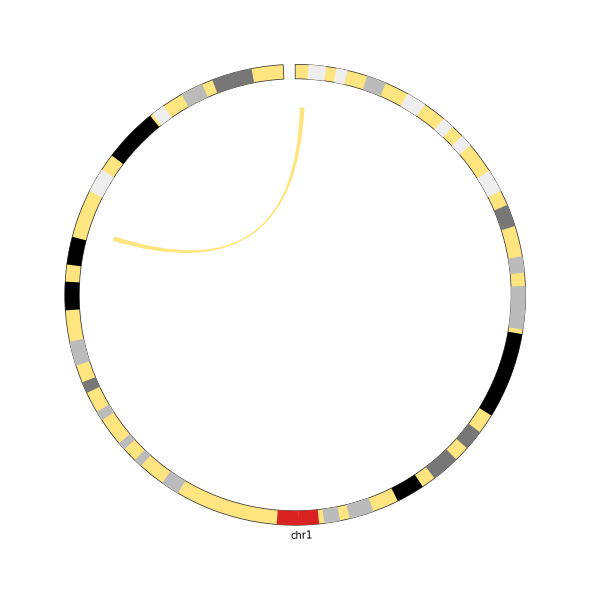

In [82]:
circle.figure

In [83]:
out_fn = os.path.join(circos_dir, 'chr1.test.svg')
circle.figure.savefig(out_fn)